<a href="https://colab.research.google.com/github/rangellupitajoce-maker/Estadistica2026/blob/main/test_energy_joce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
link= "https://raw.githubusercontent.com/rangellupitajoce-maker/Estadistica2026/refs/heads/main/test_energy/test_energy_data.csv"
df=pd.read_csv(link)
df

,edificio,pies_cuadrados,numero_ocupantes,aparatos,temperatura,dia,energia
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edificio          100 non-null    object 
 1   pies_cuadrados    100 non-null    int64  
 2   numero_ocupantes  100 non-null    int64  
 3   aparatos          100 non-null    int64  
 4   temperatura       100 non-null    float64
 5   dia               100 non-null    object 
 6   energia           100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [15]:
df.describe()

,pies_cuadrados,numero_ocupantes,aparatos,temperatura,energia
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [19]:
#1. Establecer variables
x= df["pies_cuadrados"]
y= df["energia"]

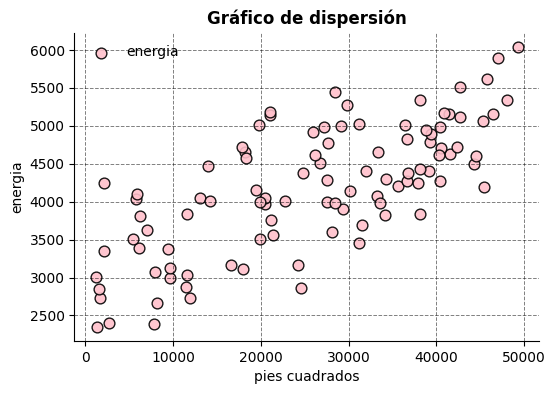

In [20]:
#2. Diagrama de dispersión
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4),  #tamaño (ancho, alto)
    dpi=100         #resolución
)
#Gráfico de dispersión
plt.scatter(
    x,y,
    marker="o",
    color="pink",
    edgecolor="black", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de punto
    label="energia" #etiqueta
)
#plt.plot(
#   x,y_calculada,
#   marker="o",
# linewidth=2.2,
#  linestyle="--",
# markersize=5,
#markerfacecolor="white",
#markeredgecolor="black",
#label="Promedio_final"

#)

#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiquetas eje x
plt.xlabel(
    "pies cuadrados",
    fontsize=10,
)
#Etiqueta eje y
plt.ylabel(
    "energia",
    fontsize=10
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.5, #transparencia
    color="black"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )


3. ¿Los datos soportan la suposición de linealidad?
Si, los datos quieren seguir una linea recta.

In [21]:
#4. Calcula el coeficiente de correlación e interpreta el resultado
from scipy.stats import pearsonr
r, valor_p=pearsonr(x,y) #p es de prueba de hipótesis
                         # Ho: P=0 No hay correlación (el cambio en una variabole está vinculado con el cambio en otra variable)
                         # H1: P\=0 Sí hay correlación
print(f"coeficiente de correlación (r):{r:0.4f}")
print(f"valor_p:{valor_p:0.4f}")


coeficiente de correlación (r):0.7240
valor_p:0.0000


4. Interpreta el resultado
*   r=0.7240 -> hay correlación.
*   El valor p=0,entoces H0 es falsa, por lo tanto sí hay correlación.
*   La relación es positiva y fuerte.

In [22]:
#5 Calcule el coeficiente de determinación e interprete el resultado. 0= r*r
print(f"coeficiente de determinación:{r**2:0.4f}")

coeficiente de determinación:0.5242


5. Interprete el resultado
*   r^2= 0.5242
*   El modelo explica a un 52.42% la variación de la variable dependiente.

In [23]:
#6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
y_calculada=modelo.predict(x_constante)
modelo.params

,0
const,3049.682473
pies_cuadrados,0.043965


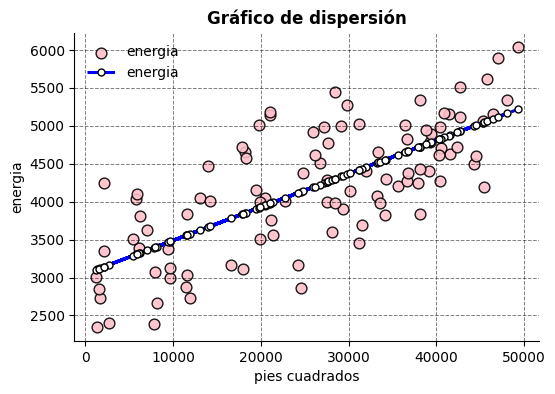

In [24]:
#6. grafíquelo sobre el gráfico de dispersión.

from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
#configuración general
plt.figure(
    figsize=(6,4),  #tamaño (ancho, alto)
    dpi=100         #resolución
)
#Gráfico de dispersión
plt.scatter(
    x,y,
    marker="o",
    color="pink",
    edgecolor="black", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de punto
    label="energia" #etiqueta
)

plt.plot(
    x,y_calculada,
    marker="o",
    color="blue",
    linewidth=2.2,
    linestyle="--",
    markersize=5,
    markerfacecolor="white",
    markeredgecolor="black",
    label="energia"

)

#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiquetas eje x
plt.xlabel(
    "pies cuadrados",
    fontsize=10,
)
#Etiqueta eje y
plt.ylabel(
    "energia",
    fontsize=10
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.5, #transparencia
    color="black"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )


In [25]:
#7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
#regresión ajustada ( 𝑏1 )
modelo.conf_int(alpha = 0.05)

,0,1
const,2804.038639,3295.326306
pies_cuadrados,0.035569,0.052361


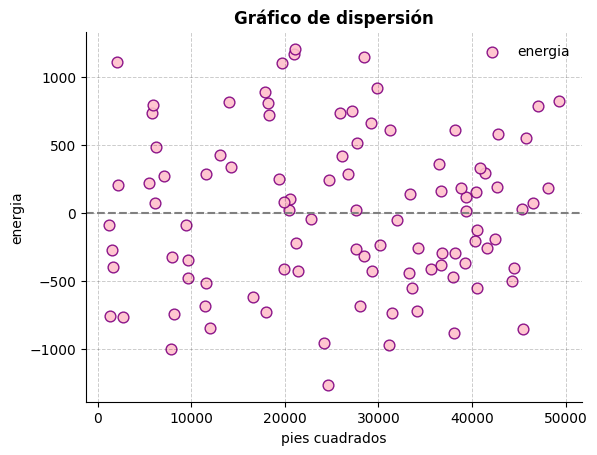

In [26]:
#8.Calcule los residuales y trace un nuevo gráfico de dispersión.
#Comente, ¿Parece que se verifican los supuestos?

residuales=modelo.resid

#Gráfico de dispersión
plt.scatter(
    x,residuales,
    marker="o",
    color="pink",
    edgecolor="purple", #color de borde
    alpha=0.9, #transparencia
    s=60, #tamaño de punto
    label="energia" #etiqueta
)

#Título
plt.title(
    "Gráfico de dispersión",
    fontsize=12, #tamaño de fuente
    fontweight="bold" #bold:negritas
)
#Etiquetas eje x
plt.xlabel(
    "pies cuadrados",
    fontsize=10,
)
#Etiqueta eje y
plt.ylabel(
    "energia",
    fontsize=10
)
#tamaño de los tricks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#Márgenes
plt.margins(x=0.05,y=0.05)
plt.gca().spines[["top","right"]].set_visible(False)

plt.grid(
    visible=True,
    linestyle="--",
    linewidth=0.7, #ancho de line
    alpha=0.2, #transparencia
    color="black"
)
    #Leyenda
plt.legend(
        fontsize=10,
        loc="best",
        frameon=False
        #bbox_to_anchor=(0.5.-0.15)
)
        #Guardar imagen
plt.savefig(
            "Dispersión",
            bbox_inches="tight"
        )

plt.axhline(y=0, color="gray", linestyle="--") #linea horizontal

#Parece que siguen el supuesto de linealidad


8. Comente, ¿Parece que se verifican los supuestos?

In [27]:
#9 Test de Shapiro
from scipy.stats import shapiro
estadistico, valor_p=shapiro(residuales)
print(f"Valor_p: {valor_p:0.4f}")

# Como el valor p es mayor a nivel de significacia, valor_p>0.05
# Entonces la hipotesis nula es verdadera: Los datos siguen una distribución normal

Valor_p: 0.1608


9. Comente el resultado del Test de Shapiro
*   Como el valor p es mayor al nivel de significacia, 0.1608>0.05
*   Entonces H0 es verdadera
*   Por lo tanto, los datos siguen una distribución normal.
